# Test data generator

In [1]:
import numpy as np
from PIL import Image, ImageOps
import pandas as pd
from keras import optimizers
from keras.models import load_model

Using TensorFlow backend.


# Load train label

In [6]:
# with open('labels.pickle', 'rb') as f:
#     old_labels = pickle.load(f)
#     labels = {v:k for k, v in old_labels.items()}

In [40]:
# with open('labels.pickle', 'rb') as f:
#     old_labels = pickle.load(f)
#     labels = {v:k for k, v in old_labels.items()}
import json
with open('label_dict.txt', 'rb') as f:
     old_labels = json.load(f)
     labels = {v:k for k, v in old_labels.items()}

In [41]:
labels


{0: 'Benjamin',
 1: 'Damarcus',
 2: 'Frank',
 3: 'Lokesh',
 4: 'Misael',
 5: 'Sohail',
 6: 'aaron',
 7: 'albert',
 8: 'brian',
 9: 'mooyoung-lee',
 10: 'vivek'}

# Prediction using a picture

In [7]:
# from keras.models import load_model
model = load_model('model/faceID_VGG16.h5')

In [8]:
# from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



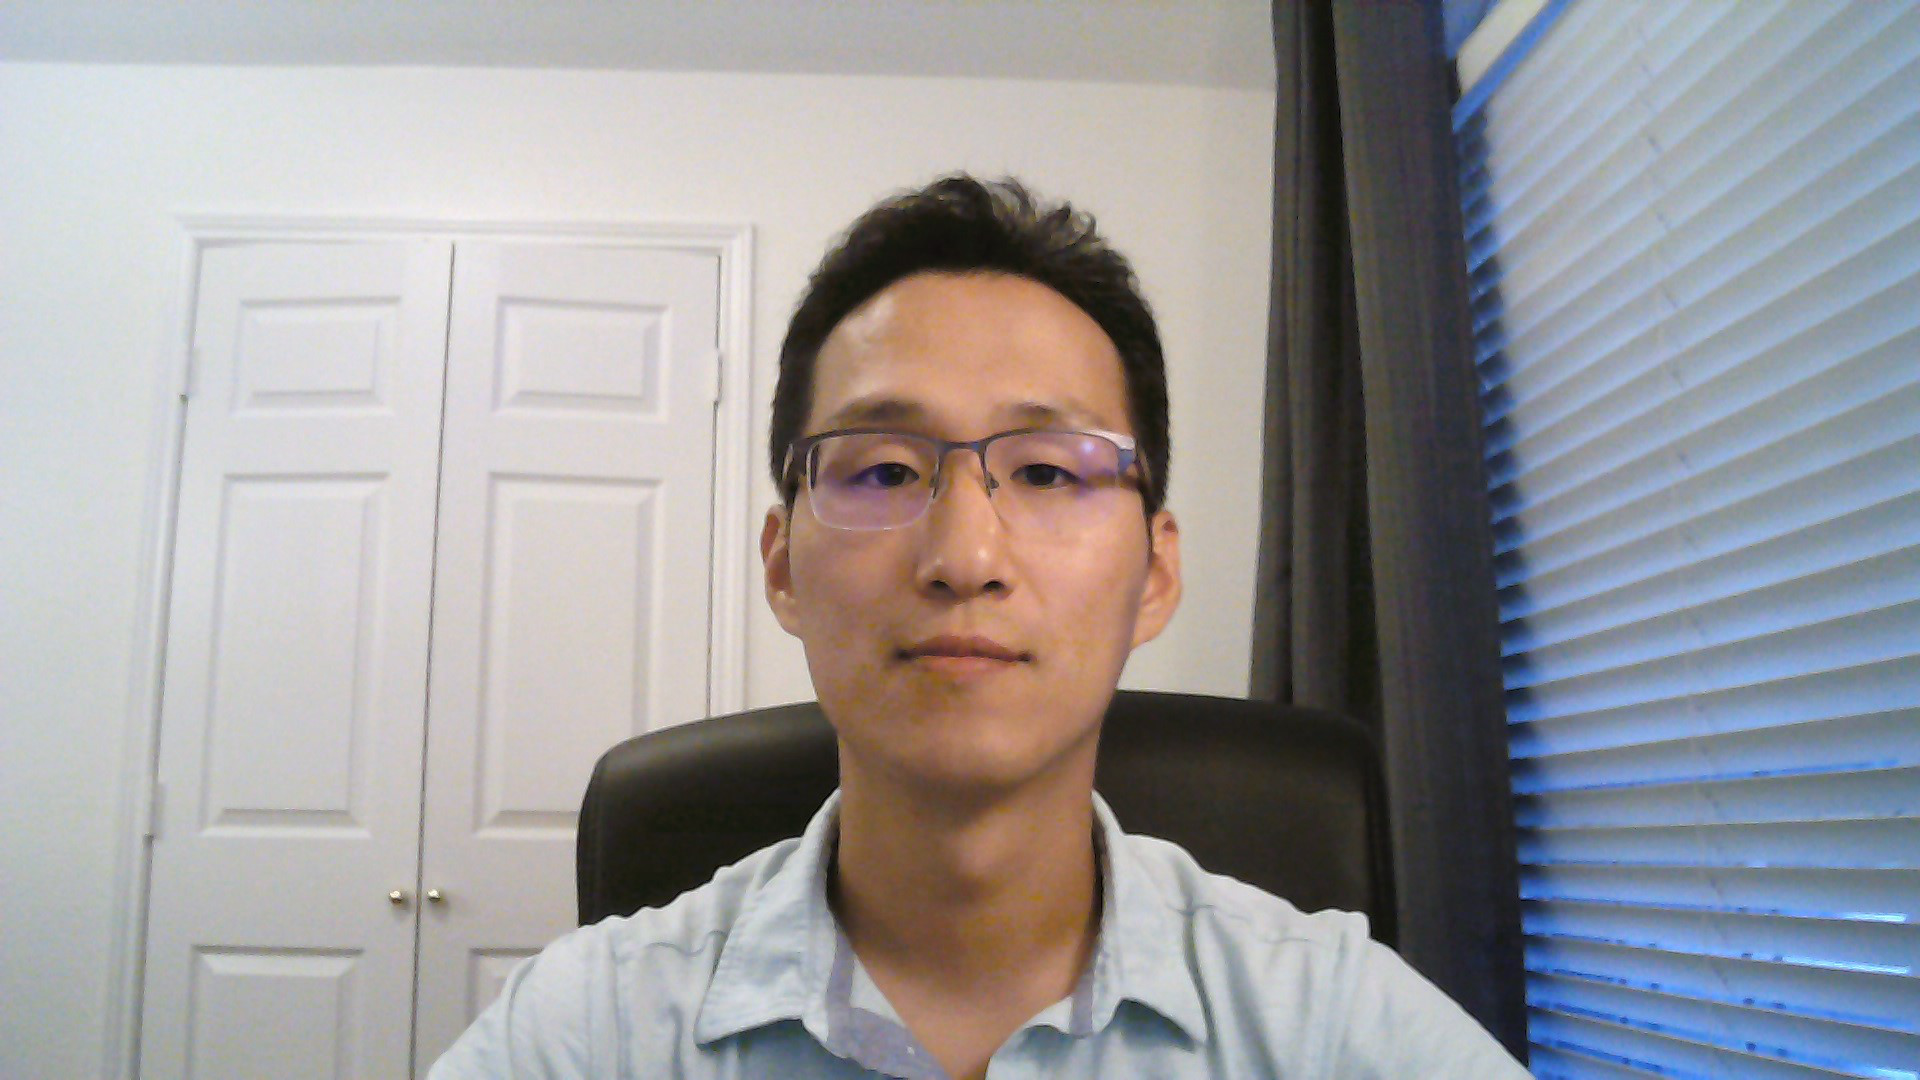

In [27]:
# from PIL import Image, ImageOps
image = Image.open('test/test.jpg')
image

In [33]:
size = (224,224)
img = ImageOps.fit(image, size, Image.ANTIALIAS)
img

# Prediction w/ probability order

In [35]:
# import pandas as pd
img = np.reshape(img,[1,224,224,3])

Num_Prediction = 5   # Number of people most matching 

label = pd.DataFrame(list(labels.items()), columns = ['ID','Name'])
label['Probability'] = model.predict(img)[0]
label.sort_values(by=['Probability'], axis = 0, ascending = False, inplace = True)
label.reset_index(drop=True, inplace=True)
print(label.iloc[0:Num_Prediction,:])

   ID          Name   Probability
0   9  mooyoung-lee  1.000000e+00
1   5        Sohail  1.345664e-13
2   0      Benjamin  0.000000e+00
3   1      Damarcus  0.000000e+00
4   2         Frank  0.000000e+00


In [ ]:
import numpy as np
from keras.models import load_model
from keras import optimizers
import pandas as pd
from PIL import Image, ImageOps

# load label
with open('gs://faceid_keras//model//labels.pickle', 'rb') as f:
    old_labels = pickle.load(f)
    labels = {v:k for k, v in old_labels.items()}

# load model
model = load_model('id/model/faceID_VGG16.h5')

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# test file prep
image = Image.open('id/test/test.jpg')

#from scipy import misc
#image = misc.imread('id/test/test.jpg')

img = ImageOps.fit(image, size, Image.ANTIALIAS)
img = np.reshape(img,[1,224,224,3])


# top-5 prediction
Num_Prediction = 5   # Number of people most matching 
label = pd.DataFrame(list(labels.items()), columns = ['ID','Name'])
label['Probability'] = model.predict(img)[0]
label.sort_values(by=['Probability'], axis = 0, ascending = False, inplace = True)
label.reset_index(drop=True, inplace=True)
print(label.iloc[0:Num_Prediction,:])